In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


**Neccessary Packages installation**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skn
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.impute import SimpleImputer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=9a9a40db0cd0fbb47ff5b542a972982cae6ca1d7cfdd6d340830f22446097c38
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


**Retrieving the dataset from google drive**

In [ ]:
movies_data = pd.read_csv('/content/drive/MyDrive/movies/movie_success_rate.csv')

In [ ]:
movies_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.10000,757074.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.00000,485820.0000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.30000,157606.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.20000,60545.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.20000,393727.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies_data.shape

(839, 33)

**Some Visualization of Dataset**

<function matplotlib.pyplot.show(*args, **kw)>

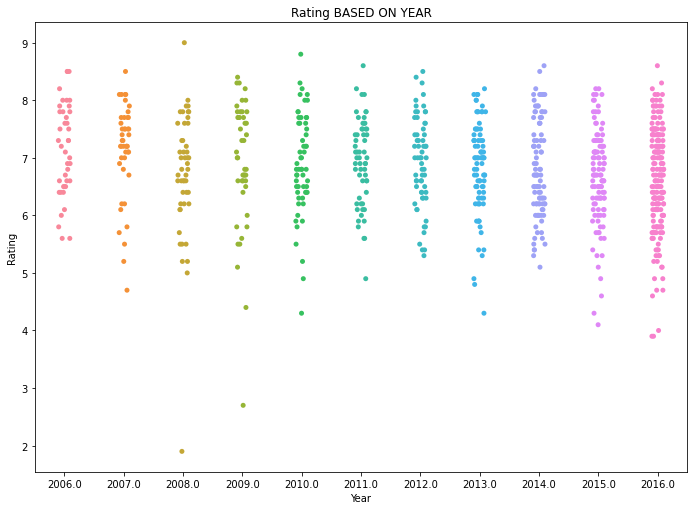

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="Year", y="Rating", data=movies_data, jitter=True);
plt.title('Rating BASED ON YEAR')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

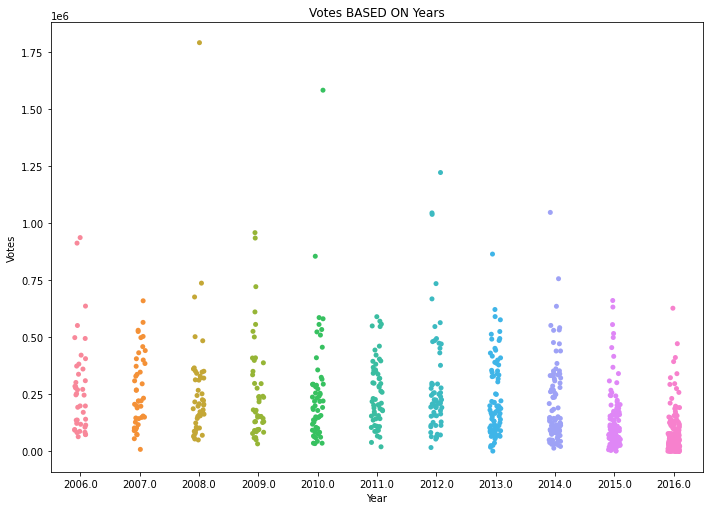

In [ ]:
a5 = (50, 40)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="Year", y="Votes", data=movies_data, jitter=True);
plt.title('Votes BASED ON Years')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

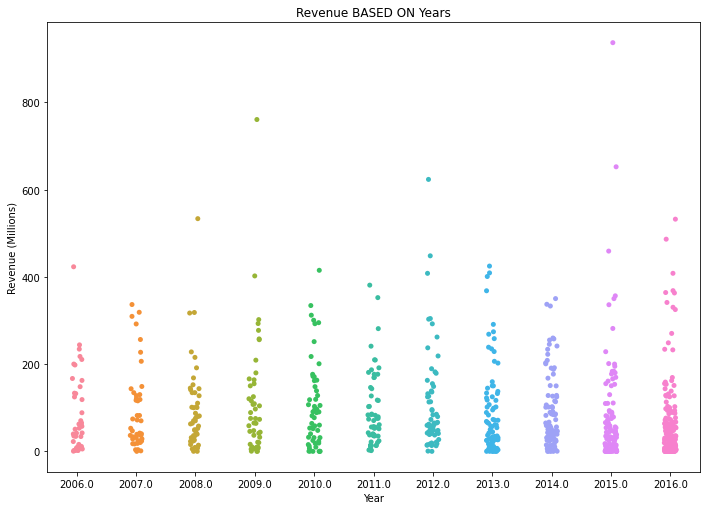

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="Year", y="Revenue (Millions)", data=movies_data, jitter=True);
plt.title('Revenue BASED ON Years')
plt.show

**Dropping Unnecessary Columns**

In [ ]:
movies_data=movies_data.drop('Title',axis=1)
movies_data=movies_data.drop('Genre',axis=1)
movies_data=movies_data.drop('Description',axis=1)
movies_data=movies_data.drop('Director',axis=1)
movies_data=movies_data.drop('Actors',axis=1)
movies_data

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,2014.0,121.0,8.10000,757074.0000,333.130000,76.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2012.0,124.0,7.00000,485820.0000,126.460000,65.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,2016.0,117.0,7.30000,157606.0000,138.120000,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,2016.0,108.0,7.20000,60545.0000,270.320000,59.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2016.0,123.0,6.20000,393727.0000,325.020000,40.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,2012.0,88.0,6.70000,164088.0000,54.720000,48.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,2007.0,94.0,5.50000,73152.0000,17.540000,46.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,2008.0,98.0,6.20000,70699.0000,58.010000,50.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,2016.0,87.0,5.30000,12435.0000,19.640000,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking if there has any null data in the dataset

In [ ]:
movies_data.isnull().any()

Rank                   True
Year                   True
Runtime (Minutes)      True
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore              True
Action                 True
Adventure              True
Aniimation             True
Biography              True
Comedy                 True
Crime                  True
Drama                  True
Family                 True
Fantasy                True
History                True
Horror                 True
Music                  True
Musical                True
Mystery                True
Romance                True
Sci-Fi                 True
Sport                  True
Thriller               True
War                    True
Western                True
Success                True
dtype: bool

As there has null data, we need to take care of it

In [ ]:
movies_data = movies_data.fillna(movies_data.median())

In [ ]:
movies_data.isnull().any()

Rank                  False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
Action                False
Adventure             False
Aniimation            False
Biography             False
Comedy                False
Crime                 False
Drama                 False
Family                False
Fantasy               False
History               False
Horror                False
Music                 False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Sport                 False
Thriller              False
War                   False
Western               False
Success               False
dtype: bool

Then we have checkedour decision or label column - Success

In [ ]:
movies_data.Success.value_counts()

0.0    690
1.0    149
Name: Success, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


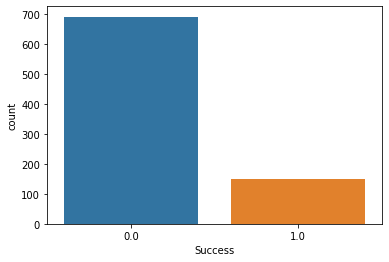

In [ ]:
sns.countplot(movies_data['Success'])

As the success and unsuccess numbers are not same we will try to make it close to equal

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = movies_data[(movies_data['Success']==0)] 
df_minority = movies_data[(movies_data['Success']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= (690+149), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
370,419.0,2010.0,146.0,7.70000,357213.0000,294.980000,65.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
321,361.0,2008.0,98.0,6.90000,223065.0000,100.470000,51.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57,68.0,2015.0,120.0,8.10000,632842.0000,153.630000,90.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
383,434.0,2011.0,132.0,7.40000,382459.0000,209.360000,73.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
241,271.0,2012.0,143.0,7.80000,547386.0000,304.360000,81.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,2012.0,88.0,6.70000,164088.0000,54.720000,48.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,2007.0,94.0,5.50000,73152.0000,17.540000,46.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,2008.0,98.0,6.20000,70699.0000,58.010000,50.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,2016.0,87.0,5.30000,12435.0000,19.640000,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_upsampled.Success.value_counts()

1.0    839
0.0    690
Name: Success, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


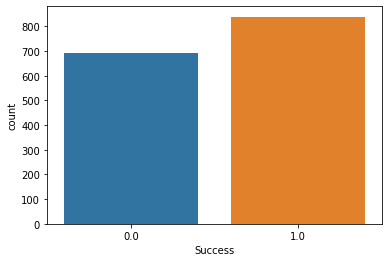

In [ ]:
sns.countplot(df_upsampled['Success'])

But later we had realised that without doing above process we get realistic prediction. So we decide not to use the newly merged success and unsuccess column and use the previous dataset.




Now, we will check the correlation among the columns, which we will use later.

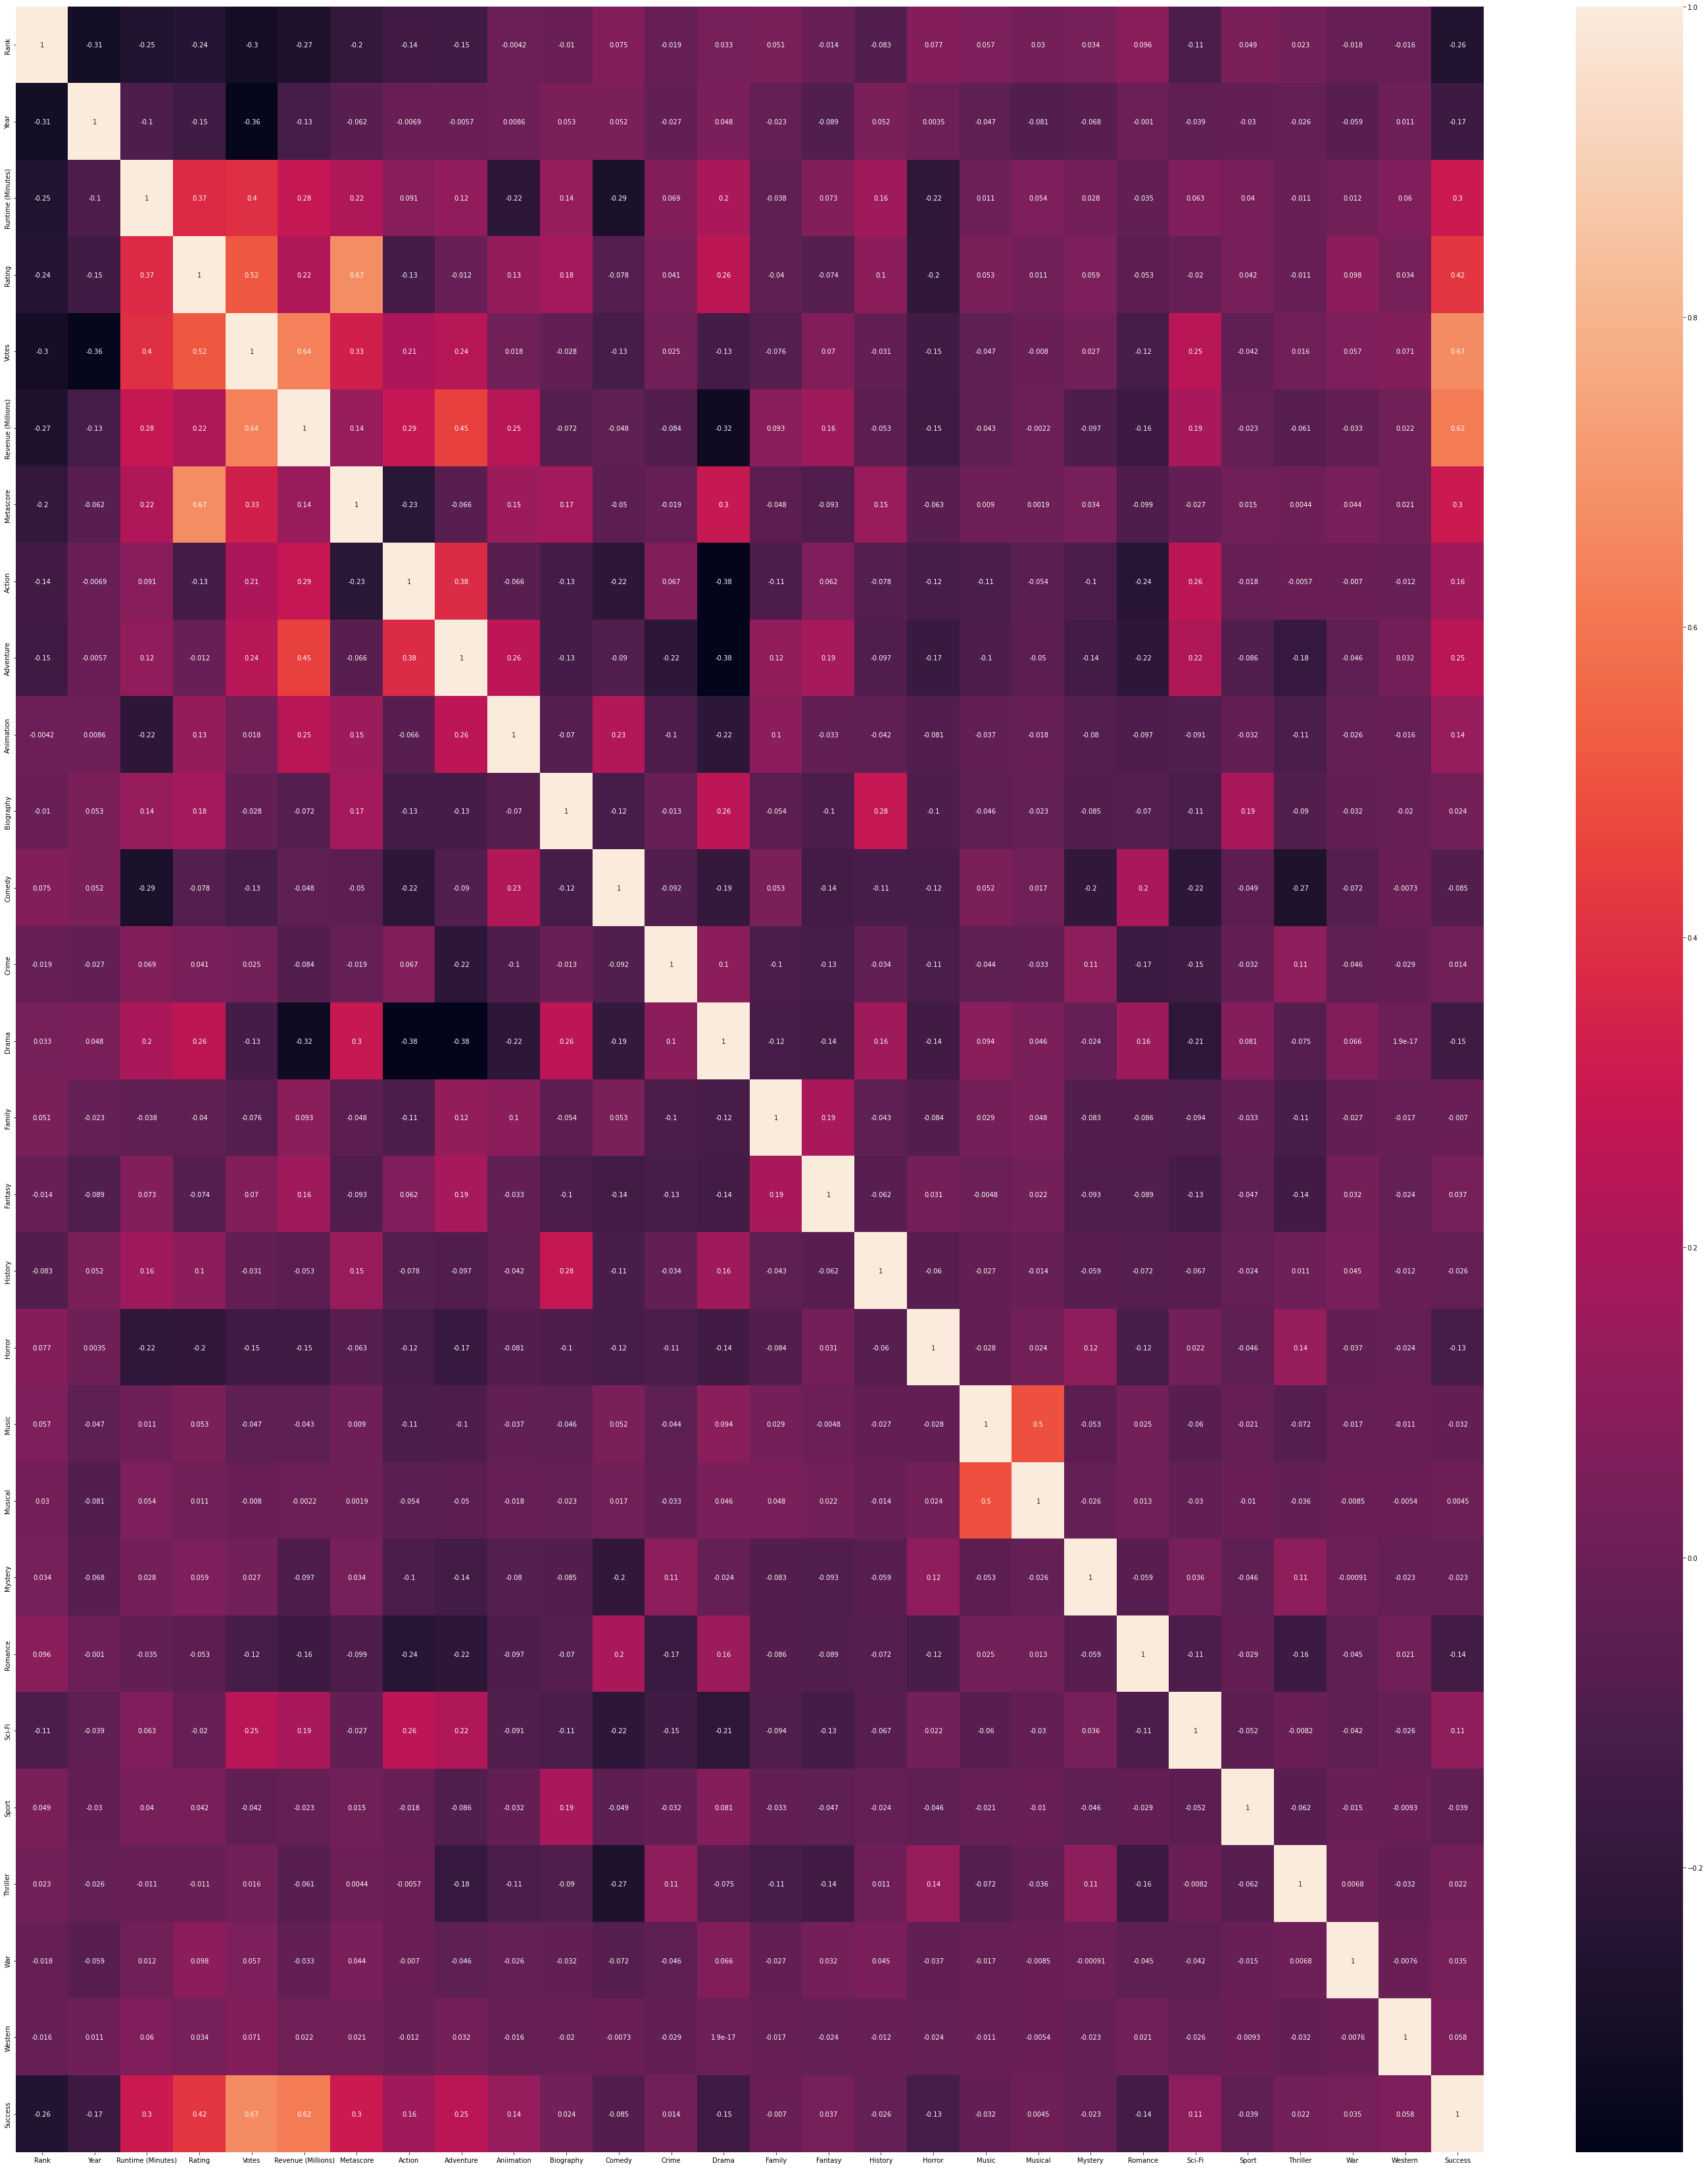

In [ ]:
mov_check_2 =movies_data.corr()
mov_check_2.style.background_gradient(cmap="coolwarm")

plt.figure(figsize=(50,60))
sns.heatmap(mov_check_2, annot=True)

From the correlation table we could determine that the columns Runtime, Votes, Rating, Metascore and Revenue have correlation with the decision column Success.

We then, also ignore the datas where vote is less than 50 in the movies

In [ ]:
indexNames = movies_data[ movies_data['Votes'] <=50 ].index
movies_data.drop(indexNames, inplace=True)

Then we have dropped some other unneccessary columns.

In [ ]:
movies_data =movies_data.drop('Rank',axis=1)
movies_data = movies_data.drop('Year',axis=1)
# movies_data = movies_data.drop('Runtime (Minutes)',axis=1)
# movies_data = movies_data.drop('Action',axis=1)
# movies_data = movies_data.drop('Aniimation',axis=1)
# movies_data = movies_data.drop('Biography',axis=1)
# movies_data = movies_data.drop('Comedy',axis=1)
# movies_data = movies_data.drop('Crime',axis=1)
movies_data

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,121.0,8.10000,757074.0000,333.130000,76.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,124.0,7.00000,485820.0000,126.460000,65.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,117.0,7.30000,157606.0000,138.120000,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,108.0,7.20000,60545.0000,270.320000,59.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,6.20000,393727.0000,325.020000,40.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,88.0,6.70000,164088.0000,54.720000,48.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,94.0,5.50000,73152.0000,17.540000,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,98.0,6.20000,70699.0000,58.010000,50.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,87.0,5.30000,12435.0000,19.640000,11.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Now, we store the features within X (Runtime, Votes, Rating, Metascore and Revenue) and label in Y.**

In [ ]:

new_set = movies_data
# new_set.drop()
X = new_set.values[:, 0:5]
Y = new_set.values[:,-1]
print(X)
print(Y)

[[1.21000000e+02 8.10000000e+00 7.57074000e+05 3.33130000e+02
  7.60000000e+01]
 [1.24000000e+02 7.00000000e+00 4.85820000e+05 1.26460000e+02
  6.50000000e+01]
 [1.17000000e+02 7.30000000e+00 1.57606000e+05 1.38120000e+02
  6.20000000e+01]
 ...
 [9.80000000e+01 6.20000000e+00 7.06990000e+04 5.80100000e+01
  5.00000000e+01]
 [8.70000000e+01 5.30000000e+00 1.24350000e+04 1.96400000e+01
  1.10000000e+01]
 [1.12000000e+02 6.81431981e+00 1.93230252e+05 8.45645585e+01
  6.00000000e+01]]
[1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

**Now we split train and test data in the ratio of 80:20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[1.26000e+02 7.00000e+00 1.99048e+05 4.56000e+00 8.40000e+01]
 [1.33000e+02 4.70000e+00 1.83000e+03 2.30500e+01 5.70000e+01]
 [1.32000e+02 6.50000e+00 1.43389e+05 4.35700e+01 3.90000e+01]
 ...
 [9.70000e+01 5.50000e+00 6.70330e+04 4.82400e+01 5.50000e+01]
 [1.06000e+02 6.80000e+00 2.78379e+05 1.79020e+02 5.80000e+01]
 [1.18000e+02 6.20000e+00 5.03590e+04 1.33000e+00 5.10000e+01]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:

print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("Number of classes ", len(np.unique(y_train)))

x_train shape:  (671, 5)
x_test shape:  (168, 5)
y_train shape:  (671,)
y_test shape:  (168,)
Number of classes  2


This is a function made for plotting confusion matrix

---



In [ ]:
import itertools
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    y_pred = model.predict(X)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(12, 10))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

Neccessary packages and libraries for precision, accuracy, f1 score and so on.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Decision Tree

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,5))}]



dt = DecisionTreeClassifier(criterion='entropy')
clf_for_dt = GridSearchCV(dt, forest_params, cv = 10, scoring='accuracy')

clf_for_dt.fit(X_train, y_train)


In [ ]:
print(clf_for_dt.best_params_)
print(clf_for_dt.best_score_)
print("Training accuracy:", clf_for_dt.score(X_train, y_train))
print("Test accuracy", clf_for_dt.score(X_test, y_test))

{'max_depth': 10, 'max_features': 4}
0.9955662862159789
Training accuracy: 1.0
Test accuracy 0.9821428571428571


Normalized confusion matrix


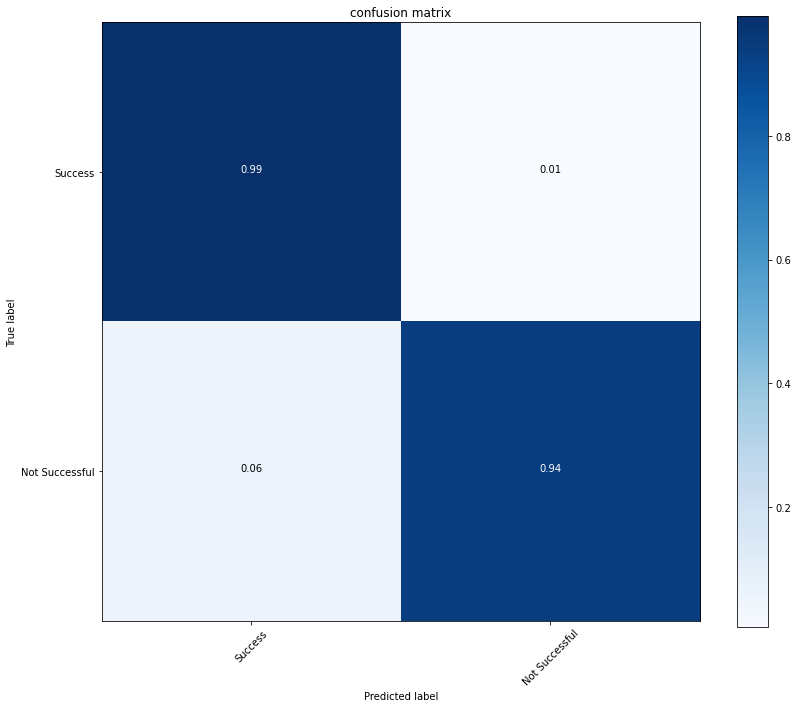

In [ ]:
from sklearn.metrics import confusion_matrix

LABELS = ["Success","Not Successful"]
plot_confusion_matrix(clf_for_dt, X_test, y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

In [ ]:
y_pred2 = clf_for_dt.predict(X_test)

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred2,average='micro'))

Precision: 0.982


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred2, average='macro'))

Recall: 0.964


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred2,average='macro'))

F1 Score: 0.970


In [ ]:

from sklearn.metrics import roc_curve
pred_prob_dt = clf_for_dt.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_dt[:,1])
print("Auc Score: ",auc_score1)

Auc Score:  0.9640923004473747


# Random Forest

 Accuracy = (TP + TN)/(TP + TN + FP + FN)

  Precision = TP/(TP + FP)

  Recall = TP / ( TP + FN)

Fl score = (2*Precision*Recall)/(Precision + Recall) 


In [ ]:
random_forest_en =RandomForestClassifier(n_estimators=300)

In [ ]:
clf_of_rf = GridSearchCV(random_forest_en, forest_params, cv = 10, scoring='accuracy')

In [ ]:
clf_of_rf.fit(X_train, y_train)

In [ ]:
print(clf_of_rf.best_params_)
print(clf_of_rf.best_score_)
print("Training accuracy:", clf_of_rf.score(X_train, y_train))
print("Test accuracy", clf_of_rf.score(X_test, y_test))

{'max_depth': 10, 'max_features': 2}
0.9910886742756805
Training accuracy: 1.0
Test accuracy 0.9940476190476191


Normalized confusion matrix


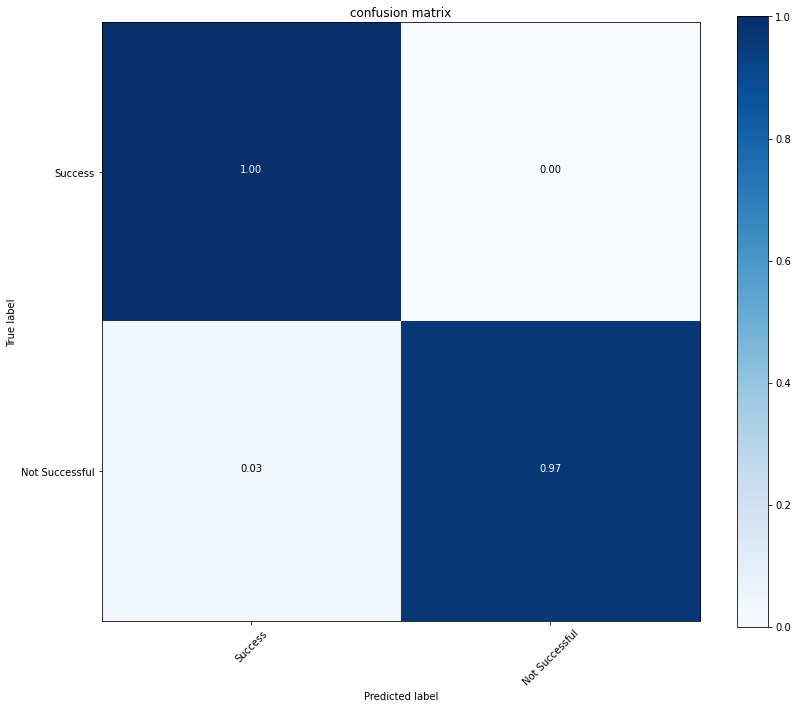

In [ ]:
from sklearn.metrics import confusion_matrix

LABELS = ["Success","Not Successful"]
plot_confusion_matrix(clf_of_rf, X_test, y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

In [ ]:
y_pred1 =clf_of_rf.predict(X_test)

In [ ]:

print('Precision: %.3f' % precision_score(y_test, y_pred1,average='micro'))

Precision: 0.994


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred1, average='macro'))

Recall: 0.984


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred1,average='macro'))

F1 Score: 0.990


In [ ]:
pred_prob_rf = clf_of_rf.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1])
print("Auc Score: ",auc_score2)

Auc Score:  0.9997645396750647


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_of_NB = GaussianNB()
clf_of_NB = clf_of_NB.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred3 = clf_of_NB.predict(X_train)
y_pred5 = clf_of_NB.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_train, y_pred3))
print('Accuracy Score on the test data: ', accuracy_score(y_test, y_pred5))

Accuracy Score on train data:  0.9135618479880775
Accuracy Score on the test data:  0.8988095238095238


Normalized confusion matrix


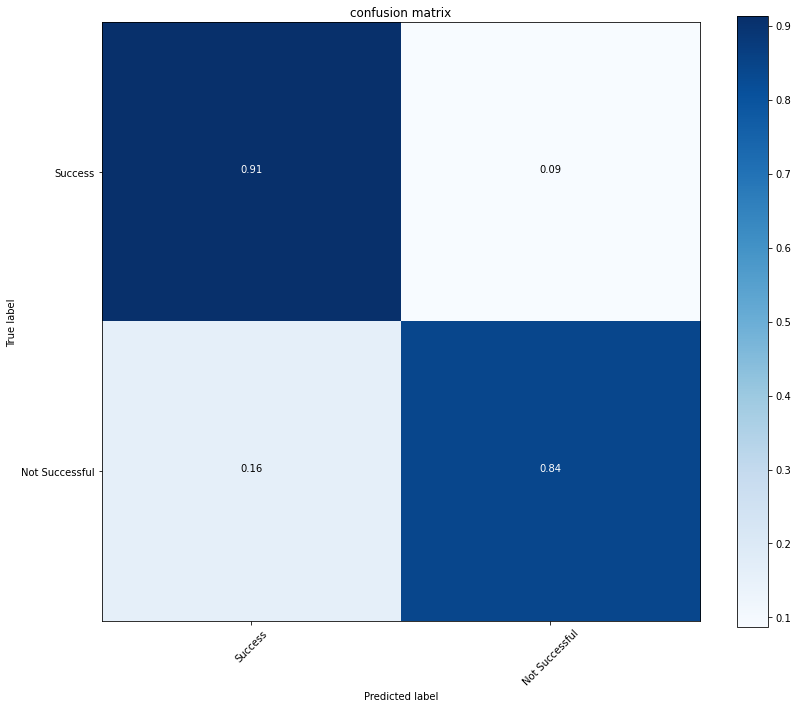

In [ ]:
from sklearn.metrics import confusion_matrix

LABELS = ["Success","Not Successful"]
plot_confusion_matrix(clf_of_NB, X_test, y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred5,average='micro'))

Precision: 0.899


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred5, average='macro'))

Recall: 0.876


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred5,average='macro'))

F1 Score: 0.845


In [ ]:
pred_prob_NB = clf_of_NB.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_NB[:,1], pos_label=1)

# from sklearn.metrics import roc_auc_score

# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob_NB[:,1])
print("Auc Score: ",auc_score3)

Auc Score:  0.9599717447610078


ROC AUC is the area under the ROC curve and is often used to evaluate the ordering quality of two classes of objects by an algorithm.

# AUC Comparison

In [ ]:
print("AUC Score for Decision Tree: ",auc_score1)
print("AUC Score for Random Forest: ",auc_score2)
print("AUC Score for Naive Bayes: ",auc_score3)

AUC Score for Decision Tree:  0.9640923004473747
AUC Score for Random Forest:  0.9997645396750647
AUC Score for Naive Bayes:  0.9599717447610078


# ROC Comparison

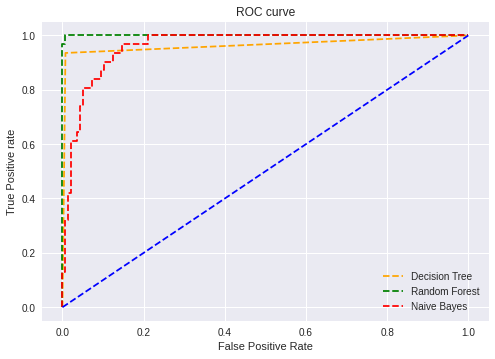

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();